### Check Planet images size needed to be downloaded for erosion AOI. 

#### From markup prepare one polygon/bbox 

In [10]:
import os
import geopandas as gpd
import shapely
import pandas as pd
import shapely.wkt
import pyproj

from shapely.ops import transform
from shapely import geometry
from shapely.geometry import Polygon, box

In [11]:
BASE = f"/home/{os.getenv('NB_USER')}/work"

WORKDIR = os.path.join(BASE, "notebooks/planet/erosion_images")

In [12]:
def read_aoi(path, crs="epsg:4326"):
    df = gpd.read_file(path) 
    if str(df.crs) != crs:
        print(f"{path}: {df.crs}. Transform to {crs}")
    df.to_crs(crs, inplace=True)
    return df

In [21]:
def to_crs(poly, target, current='EPSG:4326'):
    # print(f"TARGET CRS: {target}")
    project = pyproj.Transformer.from_crs(pyproj.CRS(current), pyproj.CRS(target), always_xy=True).transform
    transformed_poly = transform(project, poly)
    return transformed_poly

#### soil2 aoi

In [13]:
aoi_folder = os.path.join(WORKDIR, "soil2")
print(aoi_folder)

/home/jovyan/work/notebooks/planet/erosion_images/soil2


In [14]:
aoi_list = list()
for f in os.listdir(aoi_folder):
    aoi_list.append(read_aoi(os.path.join(aoi_folder, f)))

In [15]:
aoi = gpd.GeoDataFrame(pd.concat(aoi_list, ignore_index=True))

In [16]:
aoi

,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,icon,geometry
0,9.21.2017,2,None,None,None,None,1,0,-1,None,None,"POLYGON Z ((36.09433 49.51111 0.00000, 36.0944..."
1,9.21.2017,1,None,None,None,None,1,0,-1,None,None,"POLYGON Z ((36.09231 49.51109 0.00000, 36.0924..."
2,9.21.2017,4,None,None,None,None,1,0,-1,None,None,"POLYGON Z ((36.12441 49.51583 0.00000, 36.1245..."
3,9.21.2017,1,None,None,None,None,1,0,-1,None,None,"POLYGON Z ((36.12583 49.51585 0.00000, 36.1260..."
4,9.21.2017,1,None,None,None,None,1,0,-1,None,None,"POLYGON Z ((36.13788 49.51812 0.00000, 36.1380..."
...,...,...,...,...,...,...,...,...,...,...,...,...
823,4.15.2018,1,None,None,None,None,1,0,-1,None,None,"POLYGON Z ((35.62024 50.19011 0.00000, 35.6202..."
824,6.9.2010,1,None,None,None,None,1,0,-1,None,None,"POLYGON Z ((35.64868 50.07251 0.00000, 35.6486..."
825,6.9.2010,1,None,None,None,None,1,0,-1,None,None,"POLYGON Z ((35.62729 50.06507 0.00000, 35.6273..."
826,6.9.2010,1,None,None,None,None,1,0,-1,None,None,"POLYGON Z ((35.62697 50.06321 0.00000, 35.6269..."


In [17]:
aoi.to_file(os.path.join(WORKDIR, "soil2_aoi.geojson"), driver='GeoJSON')

In [24]:
bbox = box(*aoi.total_bounds)
bbox = gpd.GeoDataFrame(geometry=[box(*aoi.total_bounds)], crs=aoi.crs)

In [ ]:
bbox.to_file(os.path.join(WORKDIR, "soil2_aoi_bbox.geojson"), driver='GeoJSON')

In [26]:
transformed_bbox = to_crs(bbox.iloc[0].geometry, 'EPSG:32636')
transformed_bbox.area / 1e6

22470.307865970626

#### markup1 aoi

In [27]:
aoi_folder = os.path.join(WORKDIR, "markup1")
print(aoi_folder)

/home/jovyan/work/notebooks/planet/erosion_images/markup1


In [28]:
aoi_list = list()
for f in os.listdir(aoi_folder):
    if f.endswith(".shp"):
        aoi_list.append(read_aoi(os.path.join(aoi_folder, f)))

In [29]:
aoi = gpd.GeoDataFrame(pd.concat(aoi_list, ignore_index=True))

In [30]:
aoi

,id,Data,Code,Descriptio,Comments,Image,geometry
0,None,None,2.0,branch of tree,None,T36UXV_20190427T083601,"POLYGON ((35.62916 49.60293, 35.63015 49.60163..."
1,None,None,1.0,color+ feathers,None,T36UXV_20190427T083601,"POLYGON ((35.65070 49.60254, 35.65248 49.60301..."
2,None,None,2.0,brahch of tree,None,T36UXV_20190427T083601,"POLYGON ((35.63023 49.60826, 35.62960 49.60920..."
3,None,None,1.0,color+ feathers,None,T36UXV_20190427T083601,"POLYGON ((35.62033 49.60905, 35.62064 49.60968..."
4,None,None,1.0,color+ feathers,None,T36UXV_20190427T083601,"POLYGON ((35.60455 49.61078, 35.60597 49.61228..."
...,...,...,...,...,...,...,...
1057,None,None,NaN,None,None,None,"POLYGON ((34.25062 49.57794, 34.25084 49.57798..."
1058,None,None,NaN,None,None,None,"POLYGON ((34.21808 49.16749, 34.22399 49.16750..."
1059,None,None,NaN,None,None,None,"POLYGON ((34.20082 49.16734, 34.20511 49.16737..."
1060,None,None,NaN,None,None,None,"POLYGON ((34.20653 49.16749, 34.20954 49.16757..."


In [31]:
aoi.to_file(os.path.join(WORKDIR, "markup1_aoi.geojson"), driver='GeoJSON')

In [32]:
bbox = box(*aoi.total_bounds)
bbox = gpd.GeoDataFrame(geometry=[box(*aoi.total_bounds)], crs=aoi.crs)

In [33]:
bbox.to_file(os.path.join(WORKDIR, "markup1_aoi_bbox.geojson"), driver='GeoJSON')

In [34]:
transformed_bbox = to_crs(bbox.iloc[0].geometry, 'EPSG:32636')
transformed_bbox.area / 1e6

17939.75747932019

#### calculate image size

In [97]:
# id "3693161_3762007_2020-09-01_2304"

points = [
   [
    36.3245550026778,
    49.8060607710868
   ],
   [
    36.6717398932232,
    49.81353826301563
   ],
   [
    36.68238289516968,
    49.58887772166663
   ],
   [
    36.33682878208244,
    49.581421227612765
   ],
   [
    36.3245550026778,
    49.8060607710868
   ]
  ]

In [98]:
polygon = geometry.Polygon([p for p in points])

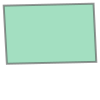

In [99]:
polygon

In [105]:
transformed = to_crs(polygon, 'EPSG:32636')

In [109]:
km2 = transformed.area / 1e6
km2

625.5403540007851

#### PSOrthotiles goes with 25x25 km2 = 625

In [111]:
img_size = 435

# 1 km2 - 100 mb
mb = img_size / km2
mb

0.6953987815779732